In [1]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP7 : APPLICATIONS CHOISIES DES BASES DE GROEBNER                           #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#

# *************************************************************************** #
# *************************************************************************** #
# TP7 : APPLICATIONS CHOISIES DES BASES DE GROEBNER                           #
# *************************************************************************** #
# *************************************************************************** #



# ****************************************************************************
# POINTS SINGULIERS 
# ****************************************************************************

[]
La liste des points d'inflexions est : []


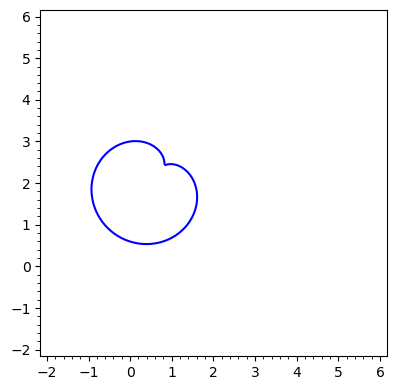

In [ ]:
reset()
print("""\
# ****************************************************************************
# POINTS SINGULIERS 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y> = PolynomialRing(QQ,2,order = 'lex')
f = 5*x^4 - 10*x^3 + 10*x^2*y^2 - 40*x^2*y + 40*x^2 - 10*x*y^2 + 40*x*y - 32*x + 5*y^4 - 40*y^3 + 115*y^2 - 136*y + 48

# Code pour l'EXERCICE
#Gradient of the equation
grad = vector(MPol, [f.derivative(x), f.derivative(y)])

# Ideal and Groebner basis computation
I = Ideal(f,grad[0],grad[1])
basis = I.groebner_basis()

#Extract roots for y
yroots = basis[1].univariate_polynomial().roots()

#Calculate singular points
roots = [(x,yval) for yval, _ in yroots for x,_ in basis[0].subs({y:yval}).univariate_polynomial().roots() for yval, _ in yroots]
print(roots)

# Calculate singular points

PtsSinguliers = roots

# # Affichage des resultats

print("La liste des points d'inflexions est :",PtsSinguliers)
G1 = implicit_plot(f,(x,-2,6),(y,-2,6),color='blue')
G2 = points(PtsSinguliers,color='red')
show(G1+G2)


In [3]:

reset()
print("""\
# ****************************************************************************
#  VALUATIONS
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

A.<x,y,z> = AffineSpace(QQ, 3)
QQ5.<rac5> = QuadraticField(5)
f1 = x^2+y^2-1
f2 = 5*x-(z-3)^2
Z = Curve([f1,f2],A)
n = z^2-6*z+5
d = x^2-x+y^2

# Code pour l'EXERCICE

var('theta')
x(theta) = theta
y(theta) = theta^2
z(theta) = theta^3

reponse2=""

zeros = []
poles = []

# # Affichage des resultats

parametric_plot3d((x,y,z),(theta,0,2))  

print(reponse2)
print("Confirmation de la lissité de la courbe : ", Z.is_smooth())

print("L'ensemble des zeros munis de leur multiplicité de h est",zeros)
print("L'ensemble des poles munis de leur multiplicité de h est",poles)


# ****************************************************************************
#  VALUATIONS
# ****************************************************************************


Confirmation de la lissité de la courbe :  True
L'ensemble des zeros munis de leur multiplicité de h est []
L'ensemble des poles munis de leur multiplicité de h est []


In [ ]:



reset()
print("""\
# ****************************************************************************
#  ENVELOPPE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,t> = PolynomialRing(QQ,3) # ORDRE DES VARIABLES A FIXER
f = (x-t)^2+(y+t^2-4*t)^2-4

# Code pour l'EXERCICE

reponse1 = "La courbe (Ct) est un XXX(A COMPLETER) dont le XXX décrit un XXX quand t varie"

eq_enveloppe = x+y
f(x,y) = eq_enveloppe

reponse4 = "Oui/Non"

# # Affichage des resultats

print(reponse1)

print("L'enveloppe de la famille de courbe a pour equation",eq_enveloppe)
implicit_plot(f,(x,-5,5),(y,-5,5)) 

print("La bille expulsée tape-t-elle le toit ?", reponse4)

reset()
print("""\
# ****************************************************************************
#  COLORATION DE GRAPHES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

G= Graph(12)
G.add_cycle(range(8))
G.add_edges([(i,i+4) for i in range(4) ])
G.add_edges([(8,5),(8,7),(9,0),(9,2),(10,1), (10,3),(11,4),(11,6) ])
G.add_edges([(8,9),(9,10),(10,11)])
G.show()
G.coloring()

MPol = PolynomialRing(QQ,12,'x',
order = 'invlex')
phi (v) = v^3-1
psi (u,v) = u^2+u*v+v^2
IG= Ideal(MPol, [phi(MPol.gen(v)) for v in G.vertices()] + [psi(MPol.gen(u),MPol.gen(v)) for (u,v) in G.edges(labels=false)])

# Code pour l'EXERCICE

reponse1 = 0
base = []
reponse3 = "vos explications pour la question 3"

# # Affichage des resultats

print("Il faut",reponse1,"couleurs pour colorer ce graphe")
print("Une base de Groebner de I(G,3) est", base)
print(reponse3)

reset()
print("""\
# ****************************************************************************
#  PREUVE DE THEOREMES GEOMETRIQUES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,u,v> = PolynomialRing(QQ,4)


# Code pour l'EXERCICE

IA = Ideal(MPol,[1])
IB = Ideal(MPol,[1])
IC = Ideal(MPol,[1])

reponse2  = "votre reponse pour la question 2"

reponse4 = "votre reponse pour la question 4"

# # Affichage des resultats

print("Les idéaux IA, IB et IC sont", IA, IB, IC)
print(reponse2)
print("detailler votre raisonnement pour la question 3")
print(reponse4)



reset()
print("""\
# ****************************************************************************
#  PROGRAMMATION ENTIERE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<p,n,d,q> = PolynomialRing(QQ,4)
I=Ideal([p^5-n,p^10-d,p^25-q])

# Code pour l'EXERCICE

base = []
reponse2 = "vos explications"

# # Affichage des resultats

print("Base de Groebner",base)
print((p^117).reduce(I))
print(reponse2)

reset()
print("""\
# ****************************************************************************
#  SURFACE DE CLEBSCH
# ****************************************************************************
""")

d
# Donnees de l'enonce de l'exercice

MPol.<x1,x2,x3> = PolynomialRing(QQ,3)
f=x1^3+x2^3+x3^3+1-(x1+x2+x3+1)^3

# Code pour l'EXERCICE


# # Affichage des resultats

implicit_plot3d(f,(x1,-5,5),(x2,-5,5),(x3,-5,5))